# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [12]:
temp = pd.read_csv("Temp_States.csv")

#### Print `temp`

In [13]:
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [14]:
temp.dtypes

# City, State: object (string)
# Temperature: float

City            object
State           object
Temperature    float64
dtype: object

#### Select the rows where state is New York

In [46]:
temp[temp["State"] == "New York"]

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [22]:
temp["Temperature"].mean()

15.15873015873016

#### We want to know cities and states with Temperature above 15 degress Celcius

In [45]:
temp.query("Temperature > 15")[["City", "State"]]

,City,State
0,NYC,New York
3,Hartford,Connecticut
5,Treton,New Jersey
6,Newark,New Jersey


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [42]:
temp.query("Temperature > 15")[["City"]]

,City
0,NYC
3,Hartford
5,Treton
6,Newark


#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [49]:
condition = "Temperature > 15 & Temperature < 20"

temp.query(condition)[["City"]]

,City
0,NYC
3,Hartford


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [54]:
def calculate_mean_and_std(df):
    result = df.groupby('State')['Temperature'].agg(['mean', 'std'])
    return result

calculate_mean_and_std(temp)

,mean,std
State,,
Connecticut,15.833333,1.964186
New Jersey,21.111111,1.571348
New York,10.740741,8.133404


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [50]:
employee = pd.read_csv("Employee.csv")

#### Explore the data types of the Temp dataframe. Comment your results

In [53]:
employee.dtypes

# All columns contain object (strings) 

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

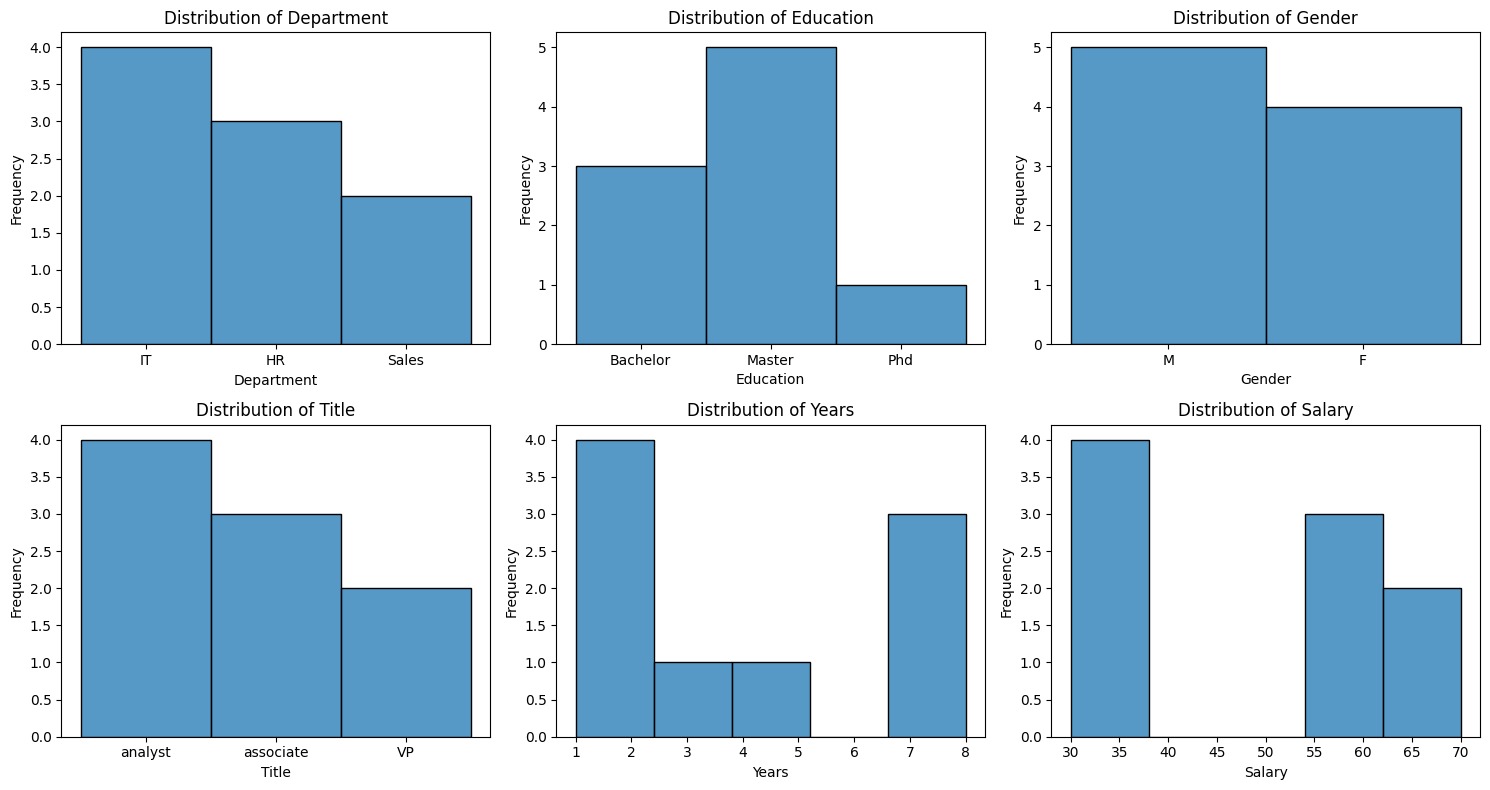

In [67]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

sns.histplot(x=employee['Department'], ax=axes[0, 0])
axes[0, 0].set_xlabel('Department')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Department')

sns.histplot(x=employee['Education'], ax=axes[0, 1])
axes[0, 1].set_xlabel('Education')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Distribution of Education')

sns.histplot(x=employee['Gender'], ax=axes[0, 2])
axes[0, 2].set_xlabel('Gender')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].set_title('Distribution of Gender')

sns.histplot(x=employee['Title'], ax=axes[1, 0])
axes[1, 0].set_xlabel('Title')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of Title')

sns.histplot(x=employee['Years'], ax=axes[1, 1])
axes[1, 1].set_xlabel('Years')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Distribution of Years')

sns.histplot(x=employee['Salary'], ax=axes[1, 2])
axes[1, 2].set_xlabel('Salary')
axes[1, 2].set_ylabel('Frequency')
axes[1, 2].set_title('Distribution of Salary')

plt.tight_layout()
plt.show()


#### Departments: 
    - Most employees work in the IT department

#### Education
    - Most employees have graduate-level education

#### Gender
    - Most of the employees are male, however the difference is minimal

#### Title
    - The most common title in employees is "analyst" 

#### Salary 
    - One could say that salary is distributed bimodally, with most concentration to the sides and no data points in the "middle"

#### Years
    - Similar to salaries, could say that Years are distributed bimodally


#### What's the average salary in this company?

In [68]:
employee["Salary"].mean()

48.888888888888886

#### What's the highest salary?

In [69]:
employee["Salary"].max()

70

#### What's the lowest salary?

In [15]:
employee["Salary"].min()

#### Who are the employees with the lowest salary?

In [70]:
employee.query("Salary == Salary.min()")[["Name"]]

,Name
1,Maria
2,David


#### Could you give all the information about an employee called David?

In [74]:
employee.query("Name == 'David'")

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [75]:

employee.query("Name == 'David'")[["Salary"]]

,Salary
2,30


#### Print all the rows where job title is associate

In [76]:
employee.query("Title == 'associate'")

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [82]:
employee.iloc[:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [83]:
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [81]:
employee.query("Title == 'associate' & Salary > 55")

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [93]:
employee.groupby("Years")["Salary"].mean().reset_index()


,Years,Salary
0,1,35.000000
1,2,38.333333
2,3,55.000000
3,4,35.000000
4,7,60.000000
5,8,70.000000


####  What is the average Salary per title?

In [94]:
employee.groupby("Title")["Salary"].mean().reset_index()


,Title,Salary
0,VP,70.000000
1,analyst,32.500000
2,associate,56.666667


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

<Axes: ylabel='Salary'>

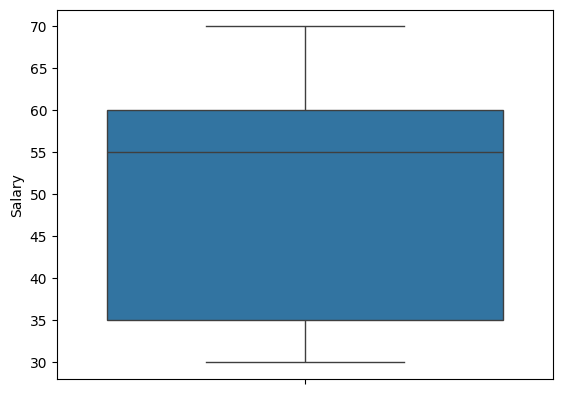

In [97]:
sns.boxplot(employee["Salary"])

In [101]:
employee["Salary"].quantile(0.25)

35.0

In [102]:
employee["Salary"].quantile(0.75)

60.0

#### Is the mean salary per gender different?

In [103]:
employee.groupby("Gender")["Salary"].mean().reset_index()

,Gender,Salary
0,F,47.5
1,M,50.0


#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [117]:
agg_func = {'Salary': ['min', 'mean', 'max'], 'Years': ['min', 'mean', 'max']}
employee.groupby('Department').agg(agg_func)    

Salary            Years              
              min   mean max   min      mean max
Department                                      
HR             30  45.00  70     2  4.666667   8
IT             30  48.75  70     1  4.500000   8
Sales          55  55.00  55     2  2.500000   3

### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [123]:
employee.groupby('Department')[['Salary']].agg(lambda x: x.max() - x.min())

,Salary
Department,
HR,40
IT,40
Sales,0


# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [110]:
orders = pd.read_csv("Orders.csv")

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [112]:
orders.info()

orders.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    397924 non-null  int64  
 1   InvoiceNo     397924 non-null  int64  
 2   StockCode     397924 non-null  object 
 3   year          397924 non-null  int64  
 4   month         397924 non-null  int64  
 5   day           397924 non-null  int64  
 6   hour          397924 non-null  int64  
 7   Description   397924 non-null  object 
 8   Quantity      397924 non-null  int64  
 9   InvoiceDate   397924 non-null  object 
 10  UnitPrice     397924 non-null  float64
 11  CustomerID    397924 non-null  int64  
 12  Country       397924 non-null  object 
 13  amount_spent  397924 non-null  float64
dtypes: float64(2), int64(8), object(4)
memory usage: 42.5+ MB


,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


####  What is the average Purchase Price?

In [113]:
orders["amount_spent"].mean()

22.394748504739596

#### What were the highest and lowest purchase prices? 

In [114]:
orders["amount_spent"].min()

0.0

In [115]:
orders["amount_spent"].max()

168469.6

#### Select all the customers we have in Spain

In [154]:
total_unique_values = orders.query("Country == 'Spain'")["CustomerID"].unique()
pd.DataFrame(total_unique_values, columns=['CustomerID'])

,CustomerID
0,12557
1,17097
2,12540
3,12551
4,12484
5,12539
6,12510
7,12421
8,12502
9,12462


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [197]:
orders.query("Country == 'Spain'")[["CustomerID"]].value_counts().count()

30

#### Select all the customers who have bought more than 50 items ?

In [164]:
pd.DataFrame(orders.query("Quantity > 50")[["CustomerID"]].value_counts().unique())

,0
0,1266
1,454
2,431
3,370
4,309
...,...
71,5
72,4
73,3
74,2


#### Select orders from Spain that are above 50 items

In [137]:
orders.query("Quantity > 50 & Country == 'Spain'").head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.0
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0


#### Select all free orders

In [167]:
orders.query("UnitPrice == 0 & amount_spent == 0").head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6914,9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
22539,33576,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
25379,40089,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0
29080,47068,540372,22090,2011,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
29082,47070,540372,22553,2011,1,4,16,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [172]:
orders.query(("Description.str.contains('lunch bag')"), engine = "python").head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
93,93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
172,174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
354,363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
359,368,536401,20725,2010,12,3,11,lunch bag red retrospot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
360,369,536401,22382,2010,12,3,11,lunch bag spaceboy design,2,2010-12-01 11:21:00,1.65,15862,United Kingdom,3.30


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [175]:
orders.query(("Description.str.contains('lunch bag') & year == 2011"), engine = "python").head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26340,42678,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26341,42679,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26512,42851,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.30
26513,42852,540023,20726,2011,1,2,12,lunch bag woodland,1,2011-01-04 12:58:00,1.65,15039,United Kingdom,1.65
26860,43616,540098,22384,2011,1,2,15,lunch bag pink polkadot,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65


#### Show the frequency distribution of the amount spent in Spain.

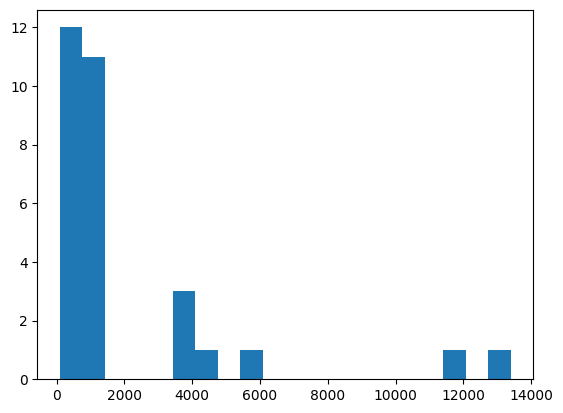

In [206]:
plt.hist(orders[orders["Country"] == "Spain"][["CustomerID", "amount_spent"]].groupby("CustomerID")["amount_spent"].sum().reset_index()["amount_spent"].reset_index().drop(["index"], axis=1), bins=20)
plt.show()

#### Select all orders made in the month of August

In [189]:
orders.query("month == 8").head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
199478,285424,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
199479,285425,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [203]:
orders[orders["month"] == 7].groupby("Country").value_counts().reset_index().groupby("Country")["count"].sum().reset_index().sort_values(["count"], ascending=False).head()


,Country,count
22,United Kingdom,23599
9,Germany,755
5,EIRE,616
8,France,448
19,Spain,180


#### What's the  average amount of money spent by country

In [205]:
orders.groupby("Country")["amount_spent"].mean().head()

Country
Australia    116.895620
Austria       25.624824
Bahrain       32.258824
Belgium       20.283772
Brazil        35.737500
Name: amount_spent, dtype: float64

#### What's the most expensive item?

In [209]:
orders.iloc[orders["UnitPrice"].idxmax()]

Unnamed: 0                   173382
InvoiceNo                    551697
StockCode                      POST
year                           2011
month                             5
day                               2
hour                             13
Description                 postage
Quantity                          1
InvoiceDate     2011-05-03 13:46:00
UnitPrice                   8142.75
CustomerID                    16029
Country              United Kingdom
amount_spent                8142.75
Name: 118352, dtype: object

#### What was the average amount spent per year ?

In [212]:
orders.groupby("year")["amount_spent"].mean()

year
2010    21.892733
2011    22.430074
Name: amount_spent, dtype: float64